**STEP 1**

In [1]:
import os
os.makedirs("data/images", exist_ok=True)


In [2]:
import shutil

shutil.move("train(1).xlsx", "data/train.xlsx")
shutil.move("test2.xlsx", "data/test.xlsx")


'data/test.xlsx'

In [3]:
os.listdir("data")


['test.xlsx', 'train.xlsx', 'images']

In [4]:
import pandas as pd

train = pd.read_excel("data/train.xlsx")
test  = pd.read_excel("data/test.xlsx")

print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (16209, 21)
Test shape: (5404, 20)


In [5]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

In [8]:
test.isnull().sum()

,0
id,0
date,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [9]:
train[['lat', 'long']].describe()


,lat,long
count,16209.000000,16209.000000
mean,47.560707,-122.214003
std,0.138340,0.140093
min,47.159300,-122.519000
25%,47.472500,-122.328000
50%,47.572400,-122.230000
75%,47.678200,-122.125000
max,47.777600,-121.315000


In [10]:
X_train = train.drop(columns=['price'])
y_train = train['price']


In [11]:
X_test = test.copy()


In [12]:
print(X_train.shape, y_train.shape)
print(X_test.shape)


(16209, 20) (16209,)
(5404, 20)


**STEP 2**

Price Distribution

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


plt.style.use("default")


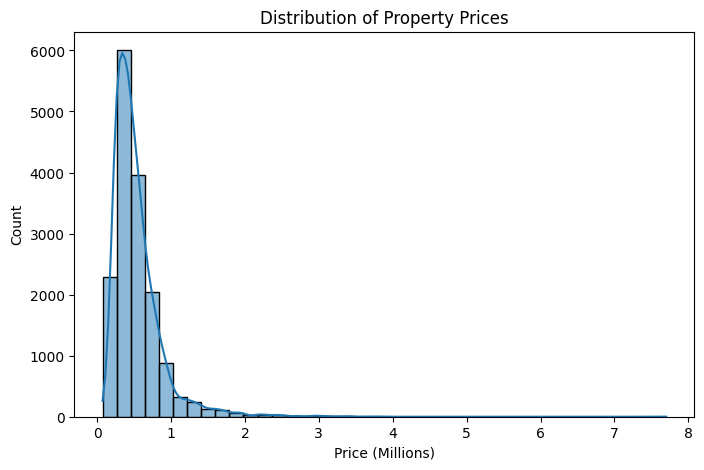

In [14]:
price_millions = y_train / 1_000_000

plt.figure(figsize=(8,5))
sns.histplot(price_millions, bins=40, kde=True)
plt.xlabel("Price (Millions)")
plt.ylabel("Count")
plt.title("Distribution of Property Prices")
plt.show()


The price distribution is heavily right-skewed due to high-value properties

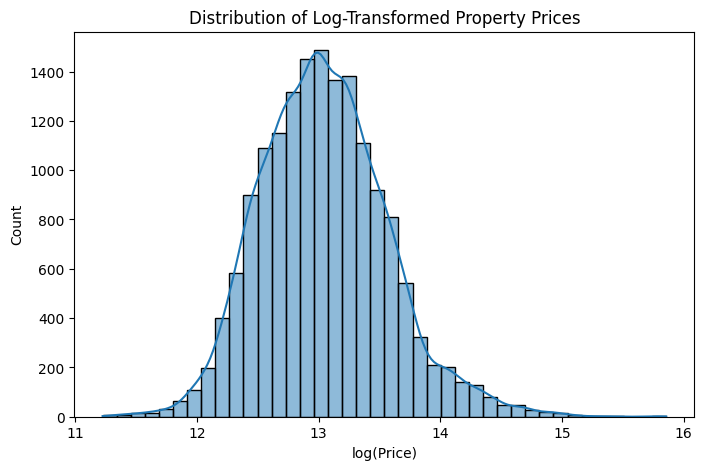

In [15]:
log_price = np.log1p(y_train)

plt.figure(figsize=(8,5))
sns.histplot(log_price, bins=40, kde=True)
plt.title("Distribution of Log-Transformed Property Prices")
plt.xlabel("log(Price)")
plt.ylabel("Count")
plt.show()


After log transformation, the distribution becomes more symmetric, making it more suitable for regression modeling

Price vs Latitude

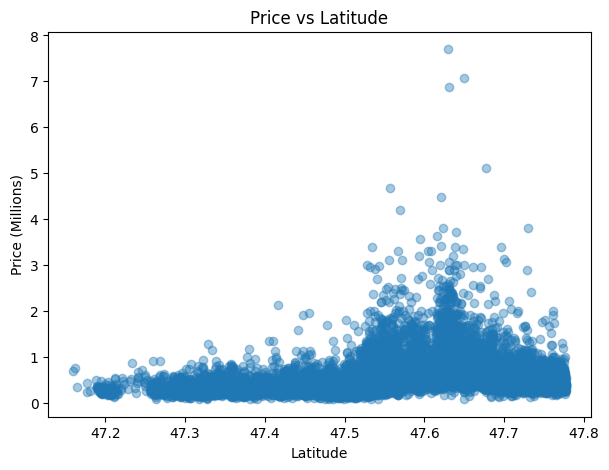

In [16]:
plt.figure(figsize=(7,5))
plt.scatter(train['lat'], price_millions, alpha=0.4)
plt.xlabel("Latitude")
plt.ylabel("Price (Millions)")
plt.title("Price vs Latitude")
plt.show()


Price vs Longitude

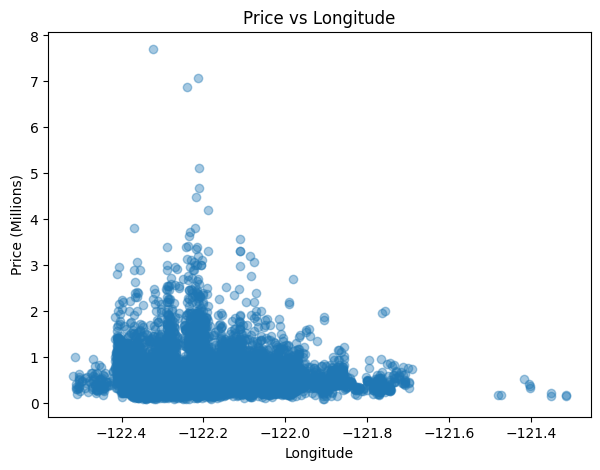

In [17]:
plt.figure(figsize=(7,5))
plt.scatter(train['long'], price_millions, alpha=0.4)
plt.xlabel("Longitude")
plt.ylabel("Price (Millions)")
plt.title("Price vs Longitude")
plt.show()


<Figure size 800x600 with 0 Axes>

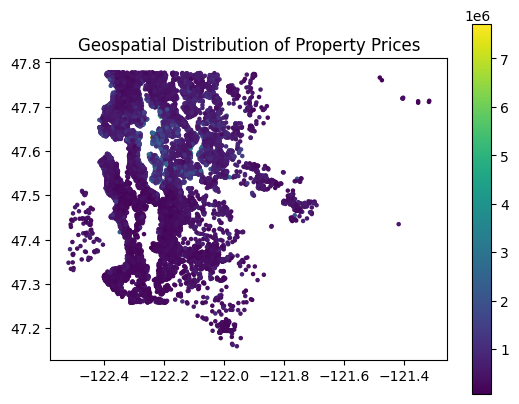

In [18]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(
    train,
    geometry=gpd.points_from_xy(train['long'], train['lat']),
    crs="EPSG:4326"
)

plt.figure(figsize=(8,6))
gdf.plot(
    column='price',
    cmap='viridis',
    legend=True,
    markersize=5
)
plt.title("Geospatial Distribution of Property Prices")
plt.show()


Distance from City Center


In [19]:
center_lat = train['lat'].mean()
center_long = train['long'].mean()


In [20]:
from geopy.distance import geodesic

train['dist_from_center'] = train.apply(
    lambda row: geodesic(
        (row['lat'], row['long']),
        (center_lat, center_long)
    ).km,
    axis=1
)


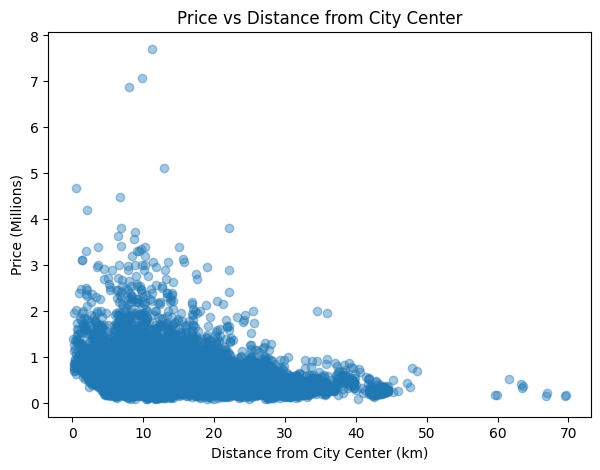

In [21]:
plt.figure(figsize=(7,5))
plt.scatter(train['dist_from_center'], price_millions, alpha=0.4)
plt.xlabel("Distance from City Center (km)")
plt.ylabel("Price (Millions)")
plt.title("Price vs Distance from City Center")
plt.show()


Based on EDA, we hypothesize that distance from the city center influence prices. This will be explored in the modeling stage.